## Data Import and Review

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fares_march = pd.read_csv("yellow_tripdata_2017-03.csv")
fares_march.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2017-03-09 21:30:11,2017-03-09 21:44:20,1,4.06,1,N,148,48,1,14.0,0.5,0.5,3.06,0.0,0.3,18.36
1,2,2017-03-09 21:47:00,2017-03-09 21:58:01,1,2.73,1,N,48,107,2,11.5,0.5,0.5,0.00,0.0,0.3,12.80
2,2,2017-03-09 22:01:08,2017-03-09 22:11:16,1,2.27,1,N,79,162,1,10.0,0.5,0.5,2.82,0.0,0.3,14.12
3,2,2017-03-09 22:16:05,2017-03-10 06:26:11,1,3.86,1,N,237,41,1,12.0,0.5,0.5,3.99,0.0,0.3,17.29
4,2,2017-03-31 06:31:53,2017-03-31 06:41:48,1,3.45,1,N,41,162,2,12.0,0.5,0.5,0.00,0.0,0.3,13.30


In [3]:
fares_june = pd.read_csv("yellow_tripdata_2017-06.csv")
fares_june.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2017-06-08 07:52:31,2017-06-08 08:01:32,6,1.03,1,N,161,140,1,7.5,1.0,0.5,1.86,0.0,0.3,11.16
1,2,2017-06-08 08:08:18,2017-06-08 08:14:00,6,1.03,1,N,162,233,1,6.0,1.0,0.5,2.34,0.0,0.3,10.14
2,2,2017-06-08 08:16:49,2017-06-08 15:43:22,6,5.63,1,N,137,41,2,21.5,1.0,0.5,0.00,0.0,0.3,23.30
3,2,2017-06-29 15:52:35,2017-06-29 16:03:27,6,1.43,1,N,142,48,1,8.5,1.0,0.5,0.88,0.0,0.3,11.18
4,1,2017-06-01 00:00:00,2017-06-01 00:03:43,1,0.60,1,N,140,141,1,4.5,0.5,0.5,2.00,0.0,0.3,7.80


In [4]:
fares_nov = pd.read_csv("yellow_tripdata_2017-11.csv")
fares_nov.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2017-11-01 00:01:48,2017-11-01 00:03:47,1,0.4,1,N,151,151,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
1,1,2017-11-01 00:18:22,2017-11-01 00:40:32,1,4.8,1,N,142,144,1,17.5,0.5,0.5,2.00,0.0,0.3,20.80
2,1,2017-11-01 00:01:58,2017-11-01 00:15:57,1,3.7,1,N,151,140,1,14.0,0.5,0.5,3.05,0.0,0.3,18.35
3,1,2017-11-01 00:18:53,2017-11-01 00:25:23,1,1.9,1,N,140,233,1,7.5,0.5,0.5,1.32,0.0,0.3,10.12
4,1,2017-11-01 00:28:56,2017-11-01 00:38:22,1,2.0,1,N,229,50,1,9.0,0.5,0.5,2.00,0.0,0.3,12.30


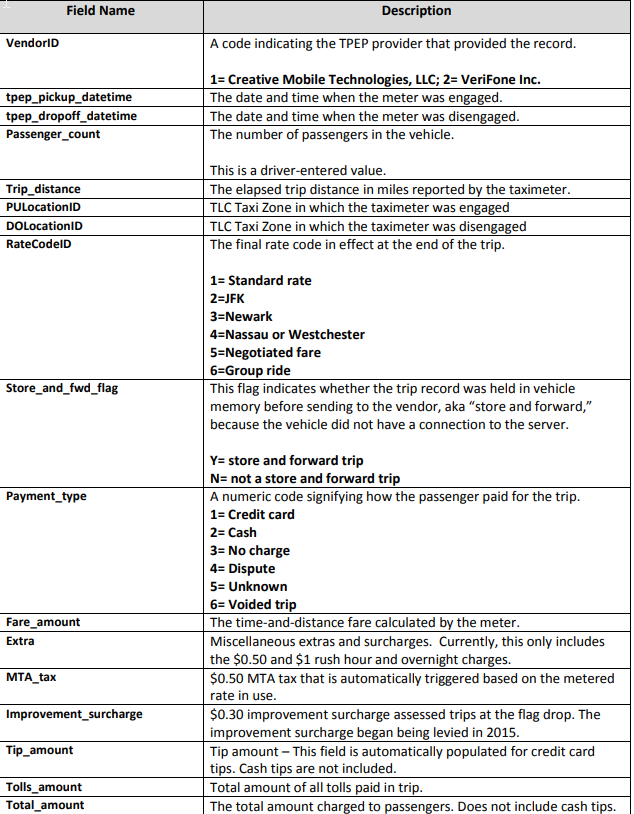

In [5]:
from IPython.display import Image
Image("data_dictionary_trip_records_yellow.png")

The data looks standard across all three files, so I will merge them into a single dataframe. Additionally, the data dictionary seems to check out. It includes the right fields. Before merging, I want to look at some of the stats across the three to see if there is significant variance that might cause us to keep them separate or treat them differently.

In [6]:
fares_march.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.029463e+07,1.029463e+07,1.029463e+07,1.029463e+07,1.029463e+07,1.029463e+07,1.029463e+07,1.029463e+07,1.029463e+07,1.029463e+07,1.029463e+07,1.029463e+07,1.029463e+07,1.029463e+07
mean,1.542260e+00,1.618225e+00,2.884684e+00,1.042257e+00,1.628985e+02,1.607315e+02,1.328744e+00,1.291388e+01,3.408597e-01,4.973619e-01,1.857154e+00,3.104581e-01,2.996462e-01,1.622369e+01
std,4.982109e-01,1.262620e+00,3.720506e+00,5.247863e-01,6.685885e+01,7.077703e+01,4.897633e-01,5.499035e+01,4.674591e-01,7.189369e-02,2.621220e+00,1.902767e+00,1.386019e-02,5.561842e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.080000e+02,-5.371000e+01,-5.000000e-01,-9.100000e+01,-1.750000e+01,-3.000000e-01,-3.088000e+02
25%,1.000000e+00,1.000000e+00,9.400000e-01,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.400000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.180000e+01
75%,2.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,2.330000e+02,2.330000e+02,2.000000e+00,1.450000e+01,5.000000e-01,5.000000e-01,2.450000e+00,0.000000e+00,3.000000e-01,1.780000e+01
max,2.000000e+00,9.000000e+00,5.985000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.718618e+05,6.980000e+01,1.033000e+02,4.254700e+02,9.235000e+02,5.000000e-01,1.718636e+05


In [7]:
fares_june.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06
mean,1.546961e+00,1.623943e+00,2.978617e+00,1.045527e+00,1.626235e+02,1.607379e+02,1.334040e+00,1.328727e+01,3.413314e-01,4.972247e-01,1.878480e+00,3.376697e-01,2.996046e-01,1.664632e+01
std,4.977898e-01,1.264608e+00,5.704095e+00,5.665036e-01,6.675223e+01,7.047343e+01,4.929622e-01,2.151675e+02,4.623294e-01,7.625157e-02,2.696221e+00,2.022799e+00,1.441594e-02,2.153387e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-5.500000e+02,-5.056000e+01,-5.000000e-01,-7.400000e+01,-1.250000e+01,-3.000000e-01,-5.503000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.750000e+00
50%,2.000000e+00,1.000000e+00,1.670000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.185000e+01
75%,2.000000e+00,2.000000e+00,3.100000e+00,1.000000e+00,2.330000e+02,2.330000e+02,2.000000e+00,1.500000e+01,5.000000e-01,5.000000e-01,2.460000e+00,0.000000e+00,3.000000e-01,1.817000e+01
max,2.000000e+00,9.000000e+00,9.496980e+03,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,6.304618e+05,2.250000e+01,1.400000e+02,4.440000e+02,9.900000e+02,1.000000e+00,6.304631e+05


In [8]:
fares_nov.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,9.284803e+06,9.284803e+06,9.284803e+06,9.284803e+06,9.284803e+06,9.284803e+06,9.284803e+06,9.284803e+06,9.284803e+06,9.284803e+06,9.284803e+06,9.284803e+06,9.284803e+06,9.284803e+06
mean,1.548844e+00,1.610932e+00,2.896256e+00,1.042297e+00,1.641413e+02,1.621717e+02,1.325616e+00,1.314085e+01,3.185823e-01,4.973424e-01,1.888192e+00,3.405769e-01,2.996331e-01,1.648760e+01
std,4.976086e-01,1.255372e+00,3.729177e+00,4.222473e-01,6.618727e+01,7.014030e+01,4.882243e-01,1.296095e+02,4.537819e-01,6.335152e-02,2.619023e+00,1.983899e+00,1.399643e-02,1.298869e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.990000e+02,-4.864000e+01,-5.000000e-01,-1.120000e+02,-1.475000e+01,-3.000000e-01,-4.993000e+02
25%,1.000000e+00,1.000000e+00,9.700000e-01,1.000000e+00,1.140000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.750000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.400000e+00,0.000000e+00,3.000000e-01,1.200000e+01
75%,2.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,2.330000e+02,2.340000e+02,2.000000e+00,1.500000e+01,5.000000e-01,5.000000e-01,2.460000e+00,0.000000e+00,3.000000e-01,1.790000e+01
max,2.000000e+00,1.920000e+02,7.025000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,3.932215e+05,6.980000e+01,9.600000e+01,4.500000e+02,1.018950e+03,1.000000e+00,3.932223e+05


The data looks pretty well filled out, as the counts across all fields match within each month. 
 - **Vendor ID** - The mean is really close across months, meaning we have similar splits from the two systems
 - The months seem to have similar numbers of records.
 - **Passenger count** has extremely similar mean and variance.
 - **Trip distance** in June has a much higher variance than the other two months, but similar means. Perhaps something to look out for, but this is one of the major variables we want to predict on, and distance is a factor in the calculation of fare, which influences tip. So I am not too concerned about this one. Should check later for correlation between distance and fare amount. They are probably confounded. The maxima are around 9,000 miles, which is clearly too large.
 - **Rate code** is interesting. The mean in all months is very close to 1, indicating the vast majority of fares are standard fares, but the variance changes significantly in June. Perhaps this is more people going to and from the airport in a summer month. I was thinking of creating binary fields for airport, maybe I should add more for some of these other types
 - **Pick Up Location** and **Drop Off Location** seem pretty similar. These are zones and the closest we have to a spatial component. Looks like there are up to 265 different zones throughout the city. This might be a good factor to indicate tip amount, as it could be a proxy for some sort of demographic. But it would need to be converted into something other than a continuous variable if we do a regression. I don't want to create 264 different binary variables. It would be nicei f there were a structure to these and I could link to something like census tract or neighborhood, but given time constraints and the wealkth of other information that are probably stronger signifiers for tip amount (fare amount, distance, fare type), I probably won't get into this.
 - **Payment type** does not vary across month. This will need to be converted into binary variables for a regression.
 - **Fare amount** shows similar means but very different standard deviations. It always has a mean of about 13, but the standard deviation swings from 55 in March to 200 in June to 130 in November. This is probably due to some extremely high fares. I should look at the distributions of these. Sure enough, the 25th, 50th, and 75th percentile breaks are extremely similar but the maxima vary.
 - **Extra** looks pretty similar but drops in November.
 - **MTA Tax** has a similar mean across months but the variance changes. However, this is a pretty small amount (tenths of a cent). Probably not a big deal, and this is probably not something we'll use to predict tip anyway since it's a standard addition.
 - **Tip Amount** - This is consistent across months. That's good since this is what we are trying to predict. Also good that the distribution doesn't seem to be affected by the total's large numbers. Perhaps those are errors.
 - **Tolls Amount** - Also pretty consistent. Slight drop in March in the mean, but variance looks similar.
 - **Total Amount** - seems to vary much like fare amount, which makes sense if it is the sum of all the monetary fields.
 
So overall I am not concerned with seasonality across the different months and feel good about using the data simply merged together. Month has no discernable effect on tip here. 

Also, the values and distributions of the fields seem to make sense. There are some large outliers on the fare amount, which are on the order of $100,000. If these were valid data points, they must be very extreme cases. Also, there are a lot of neative values, which seems strange and indicative of something wrong in the data.

In [9]:
#Merge the three dataframes
fares = pd.concat([fares_march, fares_june, fares_nov])
fares.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2017-03-09 21:30:11,2017-03-09 21:44:20,1,4.06,1,N,148,48,1,14.0,0.5,0.5,3.06,0.0,0.3,18.36
1,2,2017-03-09 21:47:00,2017-03-09 21:58:01,1,2.73,1,N,48,107,2,11.5,0.5,0.5,0.00,0.0,0.3,12.80
2,2,2017-03-09 22:01:08,2017-03-09 22:11:16,1,2.27,1,N,79,162,1,10.0,0.5,0.5,2.82,0.0,0.3,14.12
3,2,2017-03-09 22:16:05,2017-03-10 06:26:11,1,3.86,1,N,237,41,1,12.0,0.5,0.5,3.99,0.0,0.3,17.29
4,2,2017-03-31 06:31:53,2017-03-31 06:41:48,1,3.45,1,N,41,162,2,12.0,0.5,0.5,0.00,0.0,0.3,13.30


In [10]:
fares.shape

(29236424, 17)

29 million trips, with 17 fields

## Exploratory Data Analysis

Ultimately, I will probably do some kind of linear regression, as the tip is a continuous variable and I want to predict it as such. I could alternatively try to bin it and predict a round number as a categorical variable (1.00, 1.50, 2.00, etc), but I'll probably try as a continuous variable first. Either way, there are several variables that are presented as numbers that will need to be converted to binary.

I also want to look at a few plots to see some of the outliers we may have.

In [11]:
print(fares[fares.tip_amount < 0 ].shape[0], "Negative Tips")
print(fares[fares.fare_amount < 0 ].shape[0], "Negative Fares")
print(fares[fares.total_amount < 0 ].shape[0], "Negative Totals")

196 Negative Tips
14050 Negative Fares
14051 Negative Totals


There are very few records with negative amounts for fare, tip or total, relative to our 29 million data points. We can probably just ignore those and filter them out.

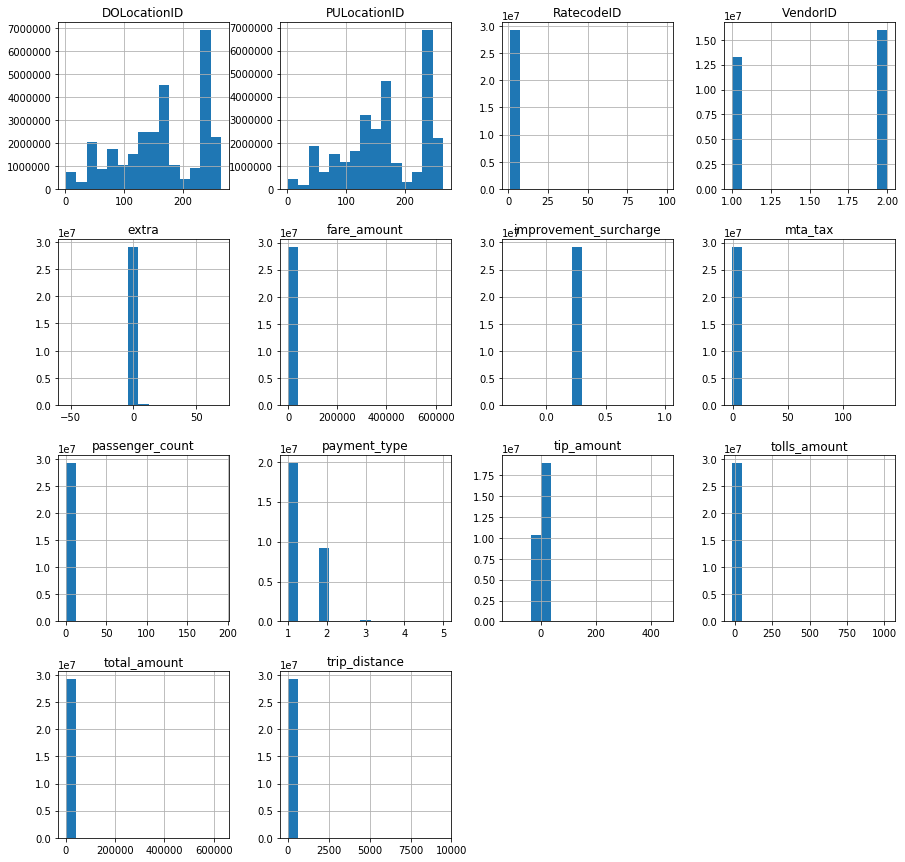

In [12]:
fares.hist(figsize=(15,15), bins=15)
plt.show()

Looking at the distributions and comparing to the data dictionary, we see there are some error values that are affecting our distributions. We should probably filter some of these out. Pickup and dropoff locations look good. 
- Rate Code ID should have a max of 6
- Extras should be 50 cents or a dollar, so a max of 1 and a min of 0 there works
- MTA tax should only be 50 cents. we're not going to use that value anyway, since it should apply to all trips. But the scale shows some strange values. Below we see some high fares in those cases. So probably good to filter out anyway.
- Passenger count has a single record with a value over 10. can remove that one.
- Distributions of toll amounts, tip amount, fare amount, and trip distance would be good to look at in more detail, but none should be negative


In [13]:
fares[fares.mta_tax > 0.5].describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,1.018182,1.141259,4.994266,3.125874,157.918881,163.513287,1.359441,112.484196,-0.374322,2.918951,2.205287,0.403538,0.018182,117.669469
std,0.133702,0.497519,27.744344,14.047273,70.022138,70.746447,0.548264,892.055392,5.256488,11.574479,3.039754,1.504091,0.133702,892.734903
min,1.000000,0.000000,0.000000,1.000000,4.000000,4.000000,1.000000,0.000000,-53.710000,0.750000,0.000000,0.000000,0.000000,0.850000
25%,1.000000,1.000000,1.000000,1.000000,112.500000,113.000000,1.000000,6.500000,0.000000,0.850000,0.000000,0.000000,0.000000,8.800000
50%,1.000000,1.000000,2.000000,1.000000,161.000000,163.000000,1.000000,10.000000,0.500000,0.850000,1.390000,0.000000,0.000000,13.000000
75%,1.000000,1.000000,4.300000,1.000000,230.000000,231.000000,2.000000,18.000000,0.500000,0.850000,2.800000,0.000000,0.000000,22.475000
max,2.000000,5.000000,733.400000,99.000000,265.000000,265.000000,4.000000,12837.450000,4.500000,140.000000,15.850000,11.560000,1.000000,12891.250000


In [14]:
fares[fares.passenger_count > 10]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8843697,2,2017-11-29 18:49:11,2017-11-29 18:55:47,192,1.07,1,N,158,68,1,6.5,1.0,0.5,1.24,0.0,0.3,9.54


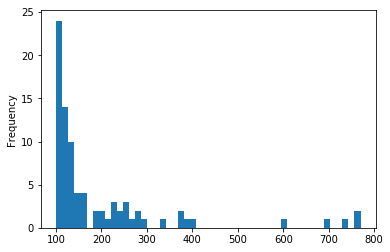

In [15]:
fares[(fares.trip_distance >100) & (fares.trip_distance <1000)]['trip_distance'].plot(kind = 'hist', bins = 50)

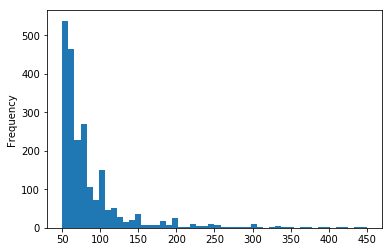

In [16]:
fares[(fares.tip_amount >50)]['tip_amount'].plot(kind = 'hist', bins = 50)

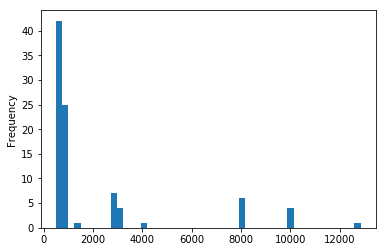

In [17]:
fares[(fares.fare_amount >500) & (fares.fare_amount <15000)]['fare_amount'].plot(kind = 'hist', bins = 50)

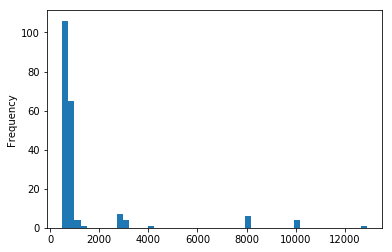

In [18]:
fares[(fares.total_amount >500) & (fares.total_amount <15000)]['total_amount'].plot(kind = 'hist', bins = 50)

I think we can safely remove anything over 400 miles, though even that is probably excessive. The tip amount seems too high but I don't have a great reason to cut any of these out yet. Perhaps other filters will help. I think fares over 500 can probably be removed as well

In [19]:
fares.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [20]:
#Filter out obviously erroneous values
fares_filtered = fares[(fares.RatecodeID <=6) &
                       (fares.extra >=0) &
                       (fares.extra <=1) &
                       (fares.mta_tax == 0.5 ) &
                       (fares.passenger_count <=10) &
                       (fares.tip_amount >=0 ) &
                       (fares.total_amount >=0 ) &
                       (fares.fare_amount >=0 ) &
                       (fares.trip_distance >=0 ) &
                       (fares.total_amount <= 500) &
                       (fares.fare_amount <= 500 ) &
                       (fares.trip_distance <=400 ) 
                      ]
fares_filtered.shape[0]

28966682

In [21]:
#Clean up but leave total dataframe
del fares_march
del fares_june
del fares_nov

In [22]:
print(29236424 - 28966682, "Records removed")
print((29236424 - 28966682) / 29236424)

269742 Records removed
0.009226230950816693


So that filtering removed 270,000 records, or just under 1 percent of our total. Seems ok. Let's look at the distributions one more time

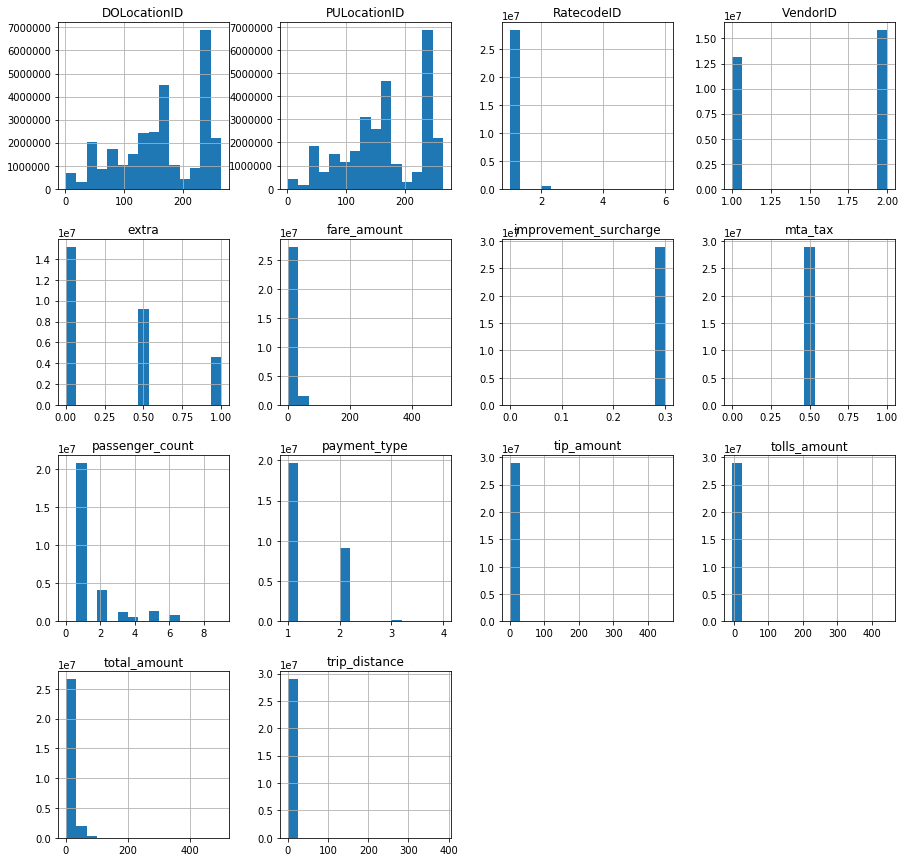

In [23]:
fares_filtered.hist(figsize=(15,15), bins=15)
plt.show()

The amounts still have some pretty long tails, but this generally looks better. The tails are probably erroneous, but without a better justification for removing points, I would rather keep the long tails in. Also, it seems like a potential outcome that we should be able to predict. The model will be less reliable at these extremes, but I'd rather at this point include and have some weird output rather than no output. There is enough data where we expect to see reasonable trips that those trips shouldn't be affected.

### Tip vs Fare
This is the strongest relationship I am expecting to find, so let's look at a few graphs quickly.

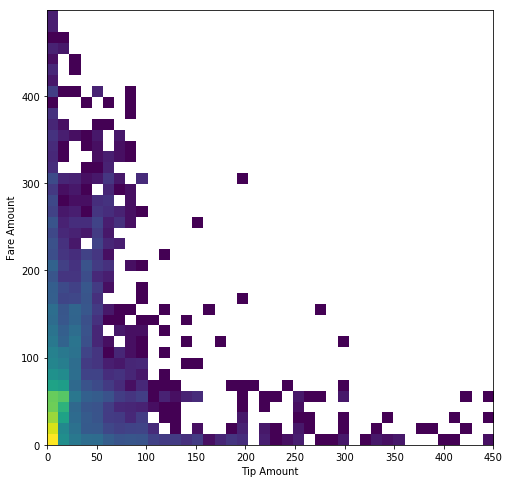

In [24]:
from matplotlib import colors
plt.figure(figsize=(8,8))
plt.hist2d(fares_filtered['tip_amount'],
           fares_filtered['fare_amount'], 
           bins = 40, norm=colors.LogNorm())
plt.xlabel("Tip Amount")
plt.ylabel("Fare Amount")
plt.show()

Most tips are below $100, so i am going to do some filtering below 100 for graphing purposes

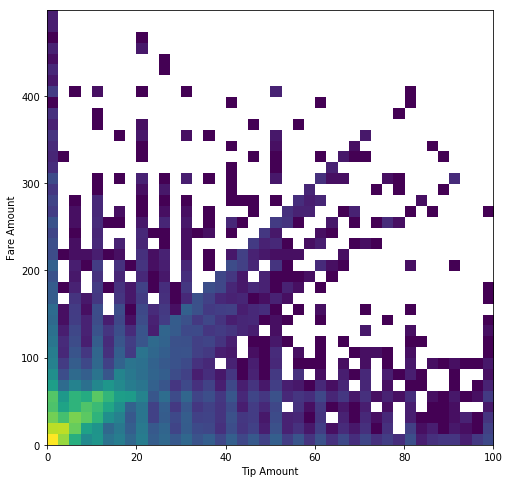

In [25]:
plt.figure(figsize=(8,8))
plt.hist2d(fares_filtered[(fares_filtered.tip_amount <= 100)]['tip_amount'],
           fares_filtered[(fares_filtered.tip_amount <= 100)]['fare_amount'], 
           bins = 40, norm=colors.LogNorm())
plt.xlabel("Tip Amount")
plt.ylabel("Fare Amount")
plt.show()

There is a definite relationship here, as indicated by the strongest diagonal line in the plot. But there are several other strong relationships.

### Fare Type Analysis
Now I want to look at histograms of the tip based on some splits. First for fare type and then by payment type

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


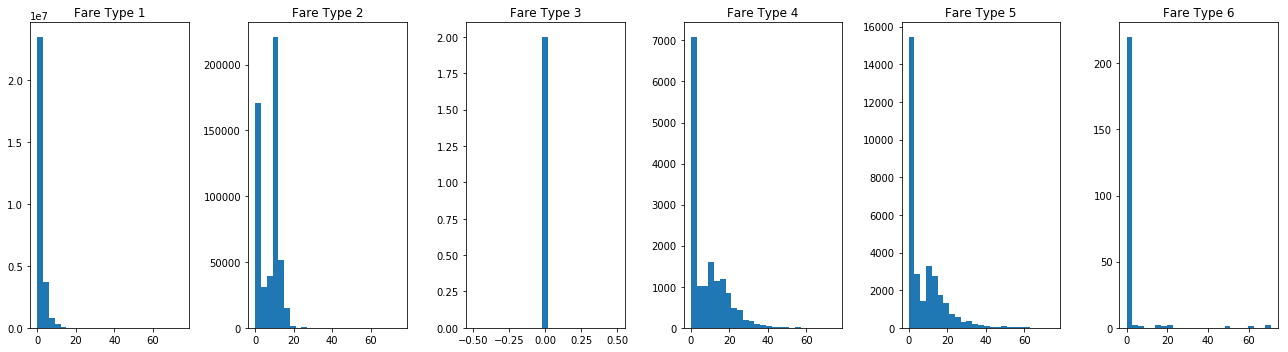

In [26]:
fig, axs = plt.subplots(1,6, figsize = (18,5), tight_layout = True)
for i in range(1,7):
    axs[i-1].hist(fares_filtered[(fares_filtered.RatecodeID == i)&
                                 (fares_filtered.tip_amount <= 75)]['tip_amount'], bins = 25)
    axs[i-1].set_title("Fare Type " + str(i))
plt.show()

So when looking withiin fare types, we do see some differences. There are far more of fare type 1 than any other record. That makes sense. Type 2 and 3 originate at JFK and Newark airport. There are only a couple fares originating in Newark, which is strange. Types 4 and 5 seem to follow similar distributions, and they aren't that far off from 1, but those are typically bigger fares, as they either go outside the city (4 is Nassau/Westchester and 5 is a negotiated fare), so we would expect that. Type 6 is a group ride, which is kind of strange to see so many small tips, but perhaps there are just no long rides. I'll look at these with respect to fare amount as well.

In [27]:
#fig, axs = plt.subplots(1,6, figsize = (18,3), tight_layout = True)
#for i in range(1,7):
#    axs[i-1].hist2d(fares_filtered[(fares_filtered.RatecodeID == i)&
#                                 (fares_filtered.tip_amount <= 75)]['tip_amount'],
#                    fares_filtered[(fares_filtered.RatecodeID == i)&
#                                 (fares_filtered.tip_amount <= 75)]['fare_amount'], bins = 40, norm=colors.LogNorm())
#    axs[i-1].set_title("Fare Type " + str(i))
#plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


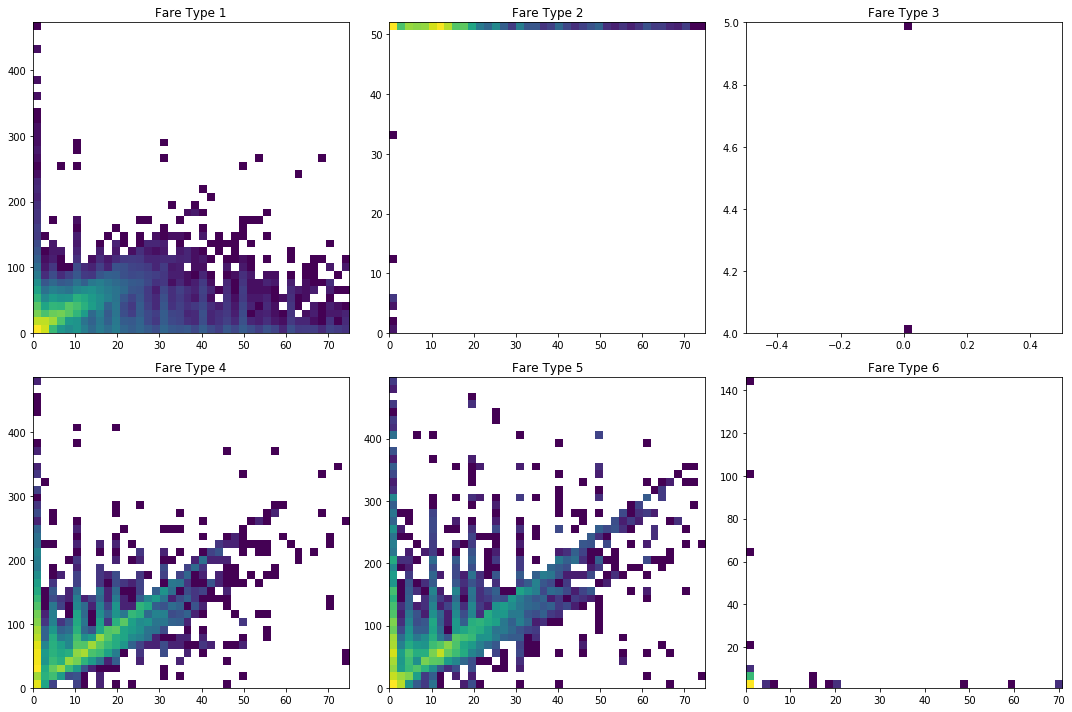

In [28]:
from matplotlib import colors
fig, axs = plt.subplots(2,3, figsize = (15,10), tight_layout = True)
for i in range(1,4):
    axs[0,i-1].hist2d(fares_filtered[(fares_filtered.RatecodeID == i)&
                                 (fares_filtered.tip_amount <= 75)]['tip_amount'],
                    fares_filtered[(fares_filtered.RatecodeID == i)&
                                 (fares_filtered.tip_amount <= 75)]['fare_amount'], bins = 40, norm=colors.LogNorm())
    axs[0,i-1,].set_title("Fare Type " + str(i))
for i in range(4,7):
    axs[1,i-4].hist2d(fares_filtered[(fares_filtered.RatecodeID == i)&
                                 (fares_filtered.tip_amount <= 75)]['tip_amount'],
                    fares_filtered[(fares_filtered.RatecodeID == i)&
                                 (fares_filtered.tip_amount <= 75)]['fare_amount'], bins = 40, norm=colors.LogNorm())
    axs[1,i-4].set_title("Fare Type " + str(i))
plt.show()

Here, the x-axis is tip amount and the y axis is fare amount. Fare type 2 (JFK) is a set rate, so the distribution of tips is not dependent on the amount. This is important for prediction. 4 and 5 seem to have steeper lines than type 1. type 6 is for group rates, which just seems like there is invalid data. Everything is either 0 tip or 0 fare (or both). Also, we see concentrations in vertical lines at round numbers. I'd be curious to see if that is more common with cash tips or card payments

### Payment Method

Let's look at similar splits of tip vs fare amount for payment types

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


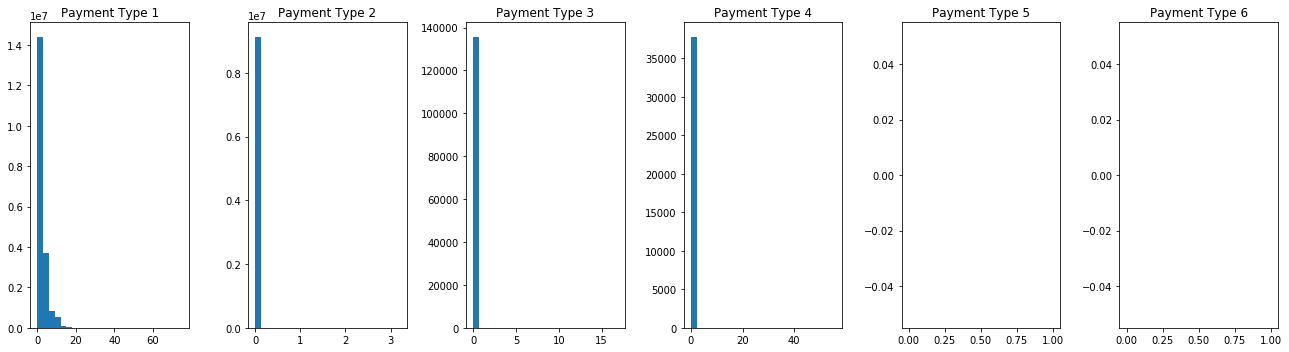

In [29]:
fig, axs = plt.subplots(1,6, figsize = (18,5), tight_layout = True)
for i in range(1,7):
    axs[i-1].hist(fares_filtered[(fares_filtered.payment_type == i)&
                                 (fares_filtered.tip_amount <= 75)]['tip_amount'], bins = 25)
    axs[i-1].set_title("Payment Type " + str(i))
plt.show()

Most of the valid values seem to be type 1, or credit card. Cash (type 2) has a lot of trips but hardly any non-zero tips. My guess is that cash tips are being paid, but not being reported. We probably should not include these data points in our model if we want to get an accurate reflection of what someone should tip, or what amount of tip the driver should receive. If we want to predict what is being reported, these would be valuable points, but that is not our goal. 

C:\Anaconda3\lib\site-packages\matplotlib\colors.py:1015: RuntimeWarning: divide by zero encountered in log
  resdat -= np.log(vmin)
C:\Anaconda3\lib\site-packages\matplotlib\colors.py:1016: RuntimeWarning: divide by zero encountered in log
  resdat /= (np.log(vmax) - np.log(vmin))
C:\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


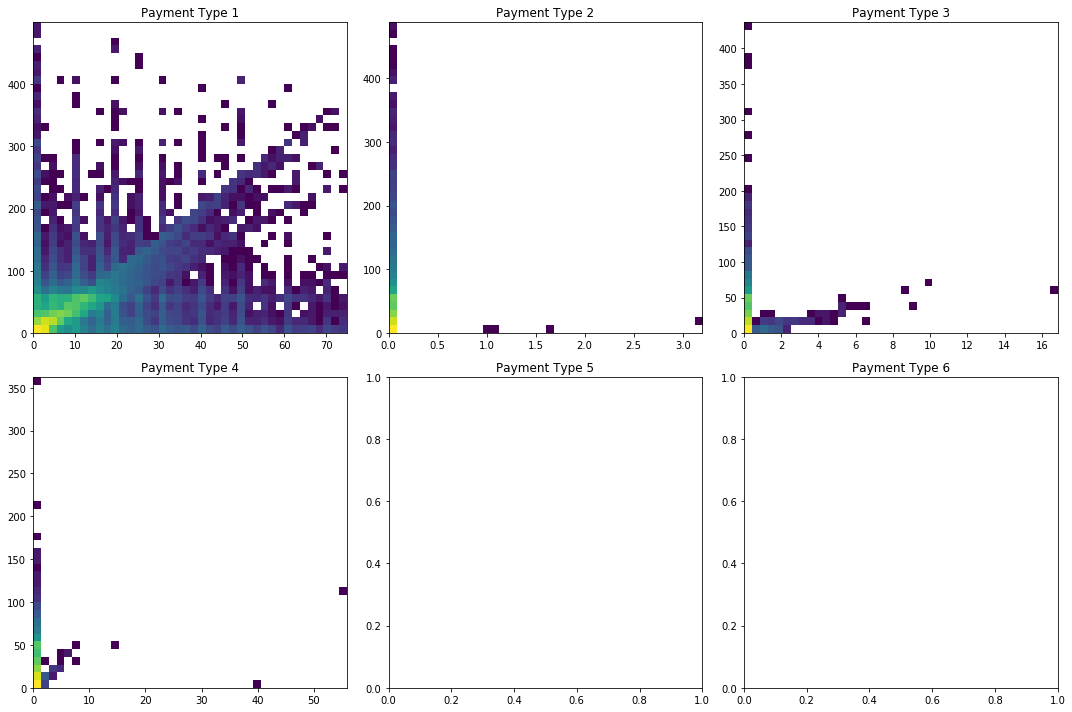

In [30]:
fig, axs = plt.subplots(2,3, figsize = (15,10), tight_layout = True)
for i in range(1,4):
    axs[0,i-1].hist2d(fares_filtered[(fares_filtered.payment_type == i)&
                                 (fares_filtered.tip_amount <= 75)]['tip_amount'],
                    fares_filtered[(fares_filtered.payment_type == i)&
                                 (fares_filtered.tip_amount <= 75)]['fare_amount'], bins = 40, norm=colors.LogNorm())
    axs[0,i-1,].set_title("Payment Type " + str(i))
for i in range(4,7):
    axs[1,i-4].hist2d(fares_filtered[(fares_filtered.payment_type == i)&
                                 (fares_filtered.tip_amount <= 75)]['tip_amount'],
                    fares_filtered[(fares_filtered.payment_type == i)&
                                 (fares_filtered.tip_amount <= 75)]['fare_amount'], bins = 40, norm=colors.LogNorm())
    axs[1,i-4].set_title("Payment Type " + str(i))
plt.show()

Again, we see cash payments having non-zero fares, but no tips are being reported. Types 3 (no charge) and 4 (dispute) show some tips and a somewhat linear relationship, but again, there are far more zero tips than non-zero. Perhaps we should filter out these trips for prediction as well, assuming there will be a charge and it will not be disputed.

In [31]:
print(fares_filtered[fares_filtered.tip_amount == 0 ].shape[0], "Zero Tips")
print(fares_filtered[fares_filtered.fare_amount == 0 ].shape[0], "Zero Fares")
print(fares_filtered[fares_filtered.total_amount == 0 ].shape[0], "Zero Totals")

10111402 Zero Tips
219 Zero Fares
7 Zero Totals


I think these are fair to leave in. That is a lot of zero tips. What about credit card payments of zero tip?

In [32]:
print(fares_filtered[(fares_filtered.tip_amount == 0)&(fares_filtered.payment_type == 1) ].shape[0], "Zero Tips")

808528 Zero Tips


So 808,000 fares have a tip of zero even when paid with a credit card. Probably worth knowing and including in our prediction.

### Day of Week

While we saw very little difference in the data for month and are therefore disregarding seasonal effects, it is plausible that weekdays and weekends might have different patterns in tipping. They certainly have different use patterns for taxis.

In [33]:
#pd.to_datetime(fares_filtered.tpep_pickup_datetime[0]).dt.dayofweek
fares_filtered['Day'] = pd.to_datetime(fares_filtered.tpep_pickup_datetime).dt.dayofweek
fares_filtered.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Day
0,2,2017-03-09 21:30:11,2017-03-09 21:44:20,1,4.06,1,N,148,48,1,14.0,0.5,0.5,3.06,0.0,0.3,18.36,3
1,2,2017-03-09 21:47:00,2017-03-09 21:58:01,1,2.73,1,N,48,107,2,11.5,0.5,0.5,0.00,0.0,0.3,12.80,3
2,2,2017-03-09 22:01:08,2017-03-09 22:11:16,1,2.27,1,N,79,162,1,10.0,0.5,0.5,2.82,0.0,0.3,14.12,3
3,2,2017-03-09 22:16:05,2017-03-10 06:26:11,1,3.86,1,N,237,41,1,12.0,0.5,0.5,3.99,0.0,0.3,17.29,3
4,2,2017-03-31 06:31:53,2017-03-31 06:41:48,1,3.45,1,N,41,162,2,12.0,0.5,0.5,0.00,0.0,0.3,13.30,4


C:\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


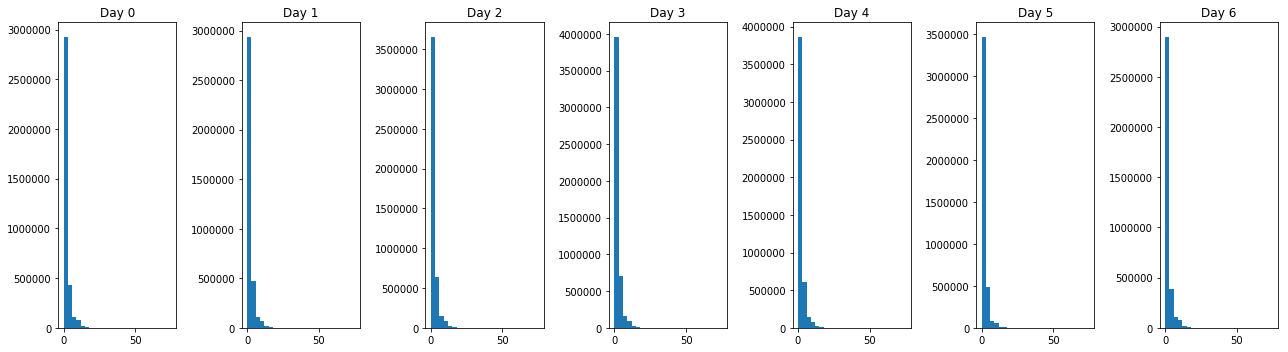

In [34]:
fig, axs = plt.subplots(1,7, figsize = (18,5), tight_layout = True)
for i in range(0,7):
    axs[i].hist(fares_filtered[(fares_filtered.Day == i)&
                                 (fares_filtered.tip_amount <= 75)]['tip_amount'], bins = 25)
    axs[i].set_title("Day " + str(i))
plt.show()

Looks awfully similar. Let's see if we see anything different when comparing against the fare amount

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


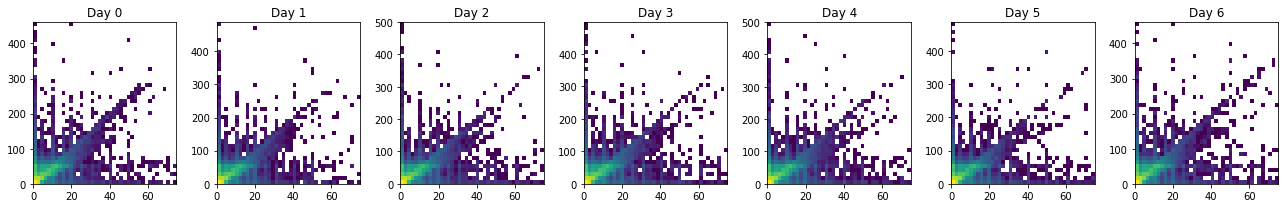

In [35]:
fig, axs = plt.subplots(1,7, figsize = (18,3), tight_layout = True)
for i in range(0,7):
    axs[i].hist2d(fares_filtered[(fares_filtered.Day == i)&
                                 (fares_filtered.tip_amount <= 75)]['tip_amount'],
                    fares_filtered[(fares_filtered.Day == i)&
                                 (fares_filtered.tip_amount <= 75)]['fare_amount'], bins = 40, norm=colors.LogNorm())
    axs[i].set_title("Day " + str(i))
plt.show()

Those look exactly the same. Nice idea, but not significant enough to put into the regression. I could check the pickup hour as well, but based on these results, I am not going to look at it because of time constraints.

### Time of Day

In [36]:
#pd.to_datetime(fares_filtered.tpep_pickup_datetime[0]).dt.dayofweek
fares_filtered['Hour'] = pd.to_datetime(fares_filtered.tpep_pickup_datetime).dt.hour
fares_filtered.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Day,Hour
0,2,2017-03-09 21:30:11,2017-03-09 21:44:20,1,4.06,1,N,148,48,1,14.0,0.5,0.5,3.06,0.0,0.3,18.36,3,21
1,2,2017-03-09 21:47:00,2017-03-09 21:58:01,1,2.73,1,N,48,107,2,11.5,0.5,0.5,0.00,0.0,0.3,12.80,3,21
2,2,2017-03-09 22:01:08,2017-03-09 22:11:16,1,2.27,1,N,79,162,1,10.0,0.5,0.5,2.82,0.0,0.3,14.12,3,22
3,2,2017-03-09 22:16:05,2017-03-10 06:26:11,1,3.86,1,N,237,41,1,12.0,0.5,0.5,3.99,0.0,0.3,17.29,3,22
4,2,2017-03-31 06:31:53,2017-03-31 06:41:48,1,3.45,1,N,41,162,2,12.0,0.5,0.5,0.00,0.0,0.3,13.30,4,6


C:\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


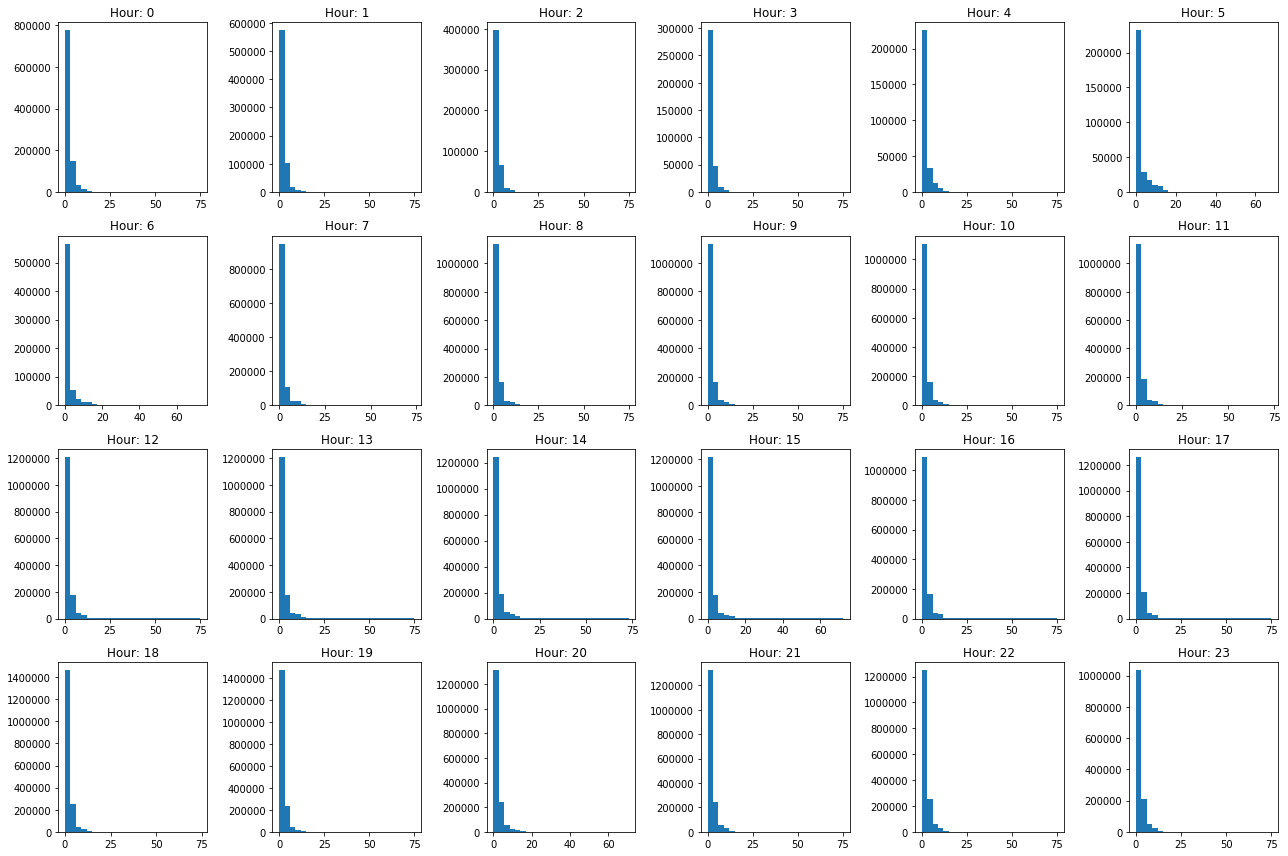

In [41]:
fig, axs = plt.subplots(4,6, figsize = (18,12), tight_layout = True)
for i in range(0,24):
    axs[int(i/6),i%6].hist(fares_filtered[(fares_filtered.Hour == i)&
                                 (fares_filtered.tip_amount <= 75)]['tip_amount'], bins = 25)
    axs[int(i/6),i%6].set_title("Hour: " + str(i))
plt.show()

Hourly results

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


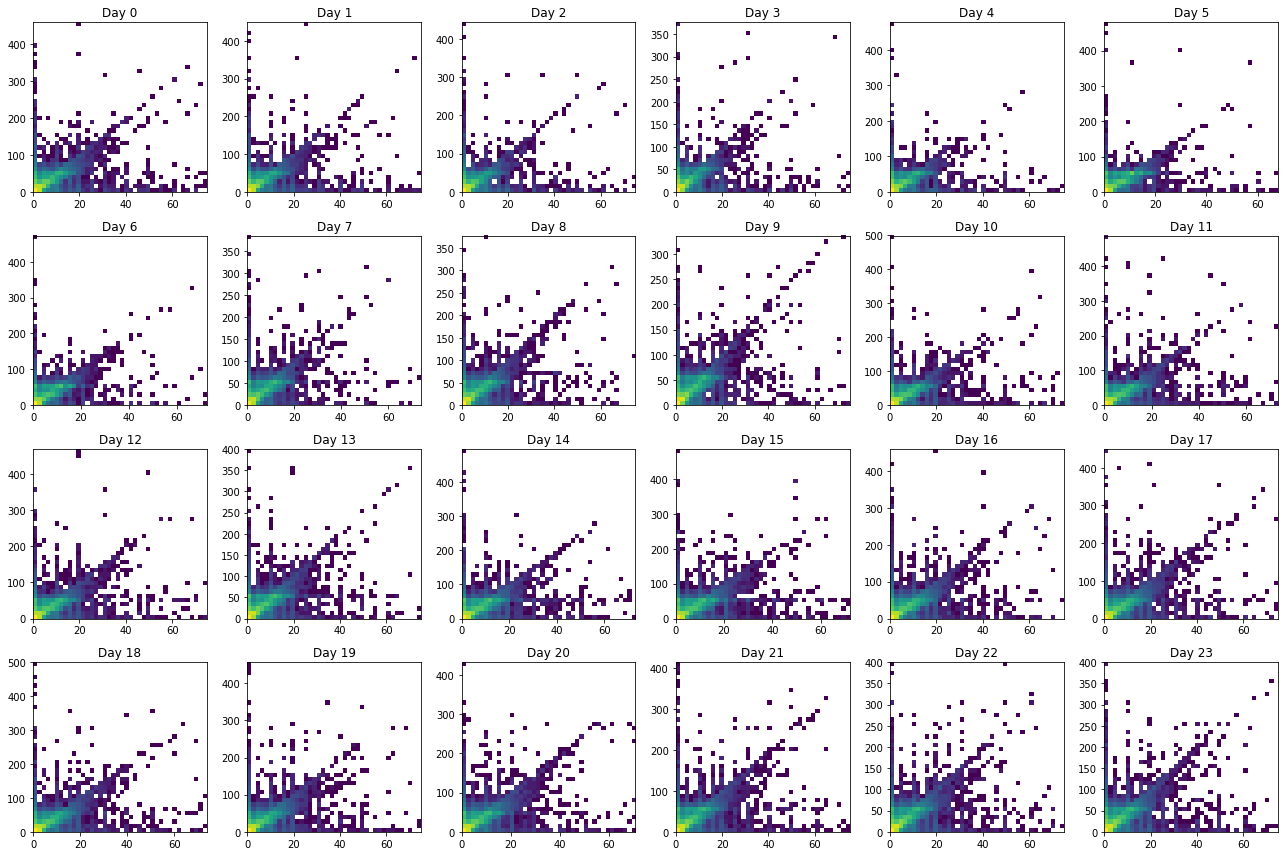

In [42]:
fig, axs = plt.subplots(4,6, figsize = (18,12), tight_layout = True)
for i in range(0,24):
    axs[int(i/6),i%6].hist2d(fares_filtered[(fares_filtered.Hour == i)&
                                 (fares_filtered.tip_amount <= 75)]['tip_amount'],
                    fares_filtered[(fares_filtered.Hour == i)&
                                 (fares_filtered.tip_amount <= 75)]['fare_amount'], bins = 40, norm=colors.LogNorm())
    axs[int(i/6),i%6].set_title("Hour " + str(i))
plt.show()

Hourly records don't show any significant differences either. Certainly there is a difference in volume, but the relationship between tip and fare does not seem to be changing based on the hour of day.

### Correlation and Confounded Variables
I want to take a quick look and see if there are confounded variables we should not be using. I do not intend to include both fare amount and total amount. Also, total amount includes tip, so that shouldn't be used for modeling. the **total - tip** might be best, and that should be equal to **fare + tolls + extras + mta_tax**

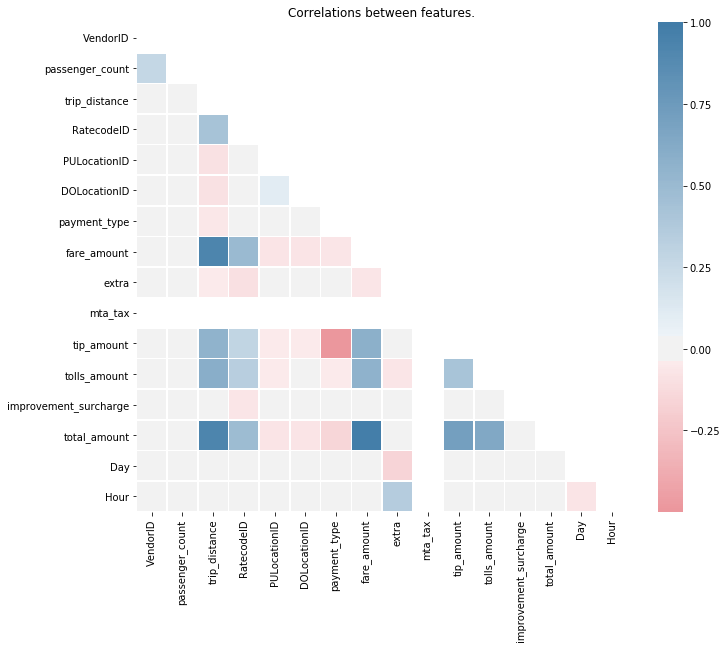

In [43]:
# plot heatmap for correlations matrix
corr = fares_filtered.corr()
fig, ax = plt.subplots(figsize=(11, 9))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 240, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=.5)
plt.title("Correlations between features.")
plt.show()

So as assumed, trip distance, fare amount, tip amount, and total amount are highly correlated. 

We have already looked at rate code, so I don't want to get into that. Besides, it's not a true continuous variable, so the correlation is meaningless. The negative correlation between tip amount and payment type is similar, and was discussed above because of the prevalence of tips only coming on credit cards. 

There's an interesting correlation between passenger count and vendor id, but neiher show correlation with tip amount, so we will ignore. Possibly one system does not account for passenger count. 

We will also ignore pickup and dropoff locations, as those are showing very little correlation to anything. And they are really categorical variables.

So that leaves us with distance, fare amount, and total amount to use for prediction. Because these three are highly correlated with each other, we should pick just one to use. I propose just using fare amount, as that is probably the best. However, it might be worth creating a field of all non-tip amounts and checking the correlations of that and fare amount against tip amount.

In [44]:
fares_filtered['nontip_total'] = fares_filtered['total_amount'] - fares_filtered['tip_amount']

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
fares_filtered.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Day,Hour,nontip_total
0,2,2017-03-09 21:30:11,2017-03-09 21:44:20,1,4.06,1,N,148,48,1,14.0,0.5,0.5,3.06,0.0,0.3,18.36,3,21,15.3
1,2,2017-03-09 21:47:00,2017-03-09 21:58:01,1,2.73,1,N,48,107,2,11.5,0.5,0.5,0.00,0.0,0.3,12.80,3,21,12.8
2,2,2017-03-09 22:01:08,2017-03-09 22:11:16,1,2.27,1,N,79,162,1,10.0,0.5,0.5,2.82,0.0,0.3,14.12,3,22,11.3
3,2,2017-03-09 22:16:05,2017-03-10 06:26:11,1,3.86,1,N,237,41,1,12.0,0.5,0.5,3.99,0.0,0.3,17.29,3,22,13.3
4,2,2017-03-31 06:31:53,2017-03-31 06:41:48,1,3.45,1,N,41,162,2,12.0,0.5,0.5,0.00,0.0,0.3,13.30,4,6,13.3


In [46]:
fares_filtered[['nontip_total', 'tip_amount', 'fare_amount']].corr()

,nontip_total,tip_amount,fare_amount
nontip_total,1.000000,0.592330,0.994881
tip_amount,0.592330,1.000000,0.583396
fare_amount,0.994881,0.583396,1.000000


So the fare amount and the nontip total correlate very strongly, and the tip amount correlates slightly better with the nontip total than with just the fare amount. So it is probably worth using the nontip total in the regression. This makes sense to me, as tolls might end up being $20, and a lot of people probably tip on the total number as opposed to a subtotal.

### Findings
- We need to filter out lots of erroneous data.
- Credit card payments are the only reliable payment type for tip prediction. We will filter out all other types.
- Fare type as defined by atypical or out of zone pickup/dropoff locations are important to prediction as they show their own patterns.
- There is no pattern to tipping tied to day of the week or month of the year in our dataset. 

## Data Preparation
Before exporting, I am going to create a list of the fields that we will use for prediction to make the export more manageable. Also I am going to create a few binary fields that match the categories we saw in fare type.

In [47]:
fares_filtered['JFK'] = fares_filtered['RatecodeID'].apply(lambda x: 1 if x == 2 else 0)
fares_filtered['long_dist'] = fares_filtered['RatecodeID'].apply(lambda x: 1 if x == 4 else 0)
fares_filtered['negotiated'] = fares_filtered['RatecodeID'].apply(lambda x: 1 if x == 5 else 0)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

In [48]:
fares_filtered.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'Day', 'Hour', 'nontip_total', 'JFK', 'long_dist',
       'negotiated'],
      dtype='object')

In [49]:
fields = ['tip_amount','nontip_total', 'JFK', 'long_dist','negotiated', 
          'passenger_count', 'trip_distance','PULocationID', 'DOLocationID',
         'fare_amount','Hour']

## Data Export
I will export as csv and pick up with modeling in a new nb file for legibility

In [50]:
#Only export records from credit cards payment type
fares_filtered[(fares_filtered.payment_type ==1)&
               (fares_filtered.RatecodeID !=3)& #remove the Newark trips
               (fares_filtered.RatecodeID !=6) #remove the group rates
              ][fields].to_csv('fares_modified.csv')